In [ ]:
!pip install shap
!pip install catboost
!pip install lightgbm
#Import Library
import time
import math
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sci
import plotly.offline as py
import plotly.graph_objs as go
import random
import shap
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
from matplotlib import pyplot as plt
import graphviz
from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.target import FeatureCorrelation
plt.style.use('fivethirtyeight')
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [ ]:
#Load Data
data = pd.read_csv('/content/drive/MyDrive/censdataf.csv')
data.set_index('date',inplace = True)
data.index = pd.to_datetime(data.index)
data.dropna()

cens        t2m         st       sst        mslp  \
date                                                                        
2018-01-01 00:00:00  1.017251  298.64847  299.53120  300.0265  100879.810   
2018-01-01 01:00:00  1.036486  298.81805  299.71527  300.0265  100981.305   
2018-01-01 02:00:00  0.925907  299.41770  299.93353  300.0265  101010.700   
2018-01-01 03:00:00  0.889134  299.52258  300.05430  300.0265  101009.625   
2018-01-01 04:00:00  0.801282  299.58655  300.16965  300.0265  100963.710   
...                       ...        ...        ...       ...         ...   
2023-06-12 15:00:00  3.443861  301.40033  302.16852  303.0125  100984.445   
2023-06-12 16:00:00  3.335938  301.32437  302.14108  303.0125  101007.640   
2023-06-12 17:00:00  3.168428  301.19110  302.11713  303.0125  100964.930   
2023-06-12 18:00:00  3.141302  301.05600  302.10226  303.0125  100921.836   
2023-06-12 19:00:00  3.023131  300.92133  302.07684  303.0125  100875.734   

                             sp       u10       v10      v925      v850  ...  \
date                                                                     ...   
2018-01-01 00:00:00  100299.000 -5.022632 -4.687611 -5.651194 -1.188097  ...   
2018-01-01 01:00:00  100400.520 -5.148923 -4.552235 -5.407810 -1.039129  ...   
2018-01-01 02:00:00  100430.810 -5.134071 -4.435445 -5.245741 -0.970690  ...   
2018-01-01 03:00:00  100431.010 -5.001983 -4.350795 -5.139023 -0.944878  ...   
2018-01-01 04:00:00  100386.490 -4.771851 -4.283898 -5.090341 -1.051479  ...   
...                         ...       ...       ...       ...       ...  ...   
2023-06-12 15:00:00  100405.200  1.412834  2.475831  3.337091  2.184173  ...   
2023-06-12 16:00:00  100428.375  1.484044  2.330457  3.155108  2.025348  ...   
2023-06-12 17:00:00  100385.820  1.602317  2.202839  2.994151  1.873852  ...   
2023-06-12 18:00:00  100342.810  1.743591  2.100695  2.854611  1.757869  ...   
2023-06-12 19:00:00  100296.734  1.802137  1.983733  2.696955  1.615283  ...   

                         div850ct      div700ct  dmslpsib   dmslphk  \
date                                                                  
2018-01-01 00:00:00  3.170000e-06 -1.560000e-07  3031.680  1490.790   
2018-01-01 01:00:00  3.110000e-06  2.570000e-07  2987.445  1420.605   
2018-01-01 02:00:00  3.420000e-06  2.810000e-07  3005.860  1394.220   
2018-01-01 03:00:00  3.540000e-06  4.270000e-07  3036.365  1341.125   
2018-01-01 04:00:00  3.200000e-06  7.010000e-07  3068.500  1314.860   
...                           ...           ...       ...       ...   
2023-06-12 15:00:00  9.240000e-07 -1.460000e-06    32.719  -426.995   
2023-06-12 16:00:00  8.860000e-07 -1.540000e-06    17.950  -474.880   
2023-06-12 17:00:00 -5.770000e-08 -1.910000e-06    66.320  -455.125   
2023-06-12 18:00:00 -4.860000e-07 -1.870000e-06   116.974  -423.070   
2023-06-12 19:00:00 -8.990000e-07 -1.360000e-06   165.886  -378.064   

                        dspsib     dsphk  dmslpct    dspct   dz925sib  \
date                                                                    
2018-01-01 00:00:00  -9008.290  -240.430  280.495  855.350  1264.7310   
2018-01-01 01:00:00  -9064.856  -310.800  263.095  837.996  1213.8647   
2018-01-01 02:00:00  -9057.400  -334.070  265.640  839.630  1218.3160   
2018-01-01 03:00:00  -9030.120  -379.210  246.515  819.240  1238.5366   
2018-01-01 04:00:00  -8987.420  -398.380  216.665  788.020  1270.9660   
...                        ...       ...      ...      ...        ...   
2023-06-12 15:00:00 -10513.850 -1905.010 -242.185  331.175  2666.2134   
2023-06-12 16:00:00 -10541.359 -1953.295 -267.940  305.385  2647.7027   
2023-06-12 17:00:00 -10505.120 -1934.080 -267.890  305.266  2686.6160   
2023-06-12 18:00:00 -10466.146 -1902.700 -274.391  298.706  2725.8106   
2023-06-12 19:00:00 -10427.954 -1858.294 -255.144  317.926  2767.5816   

                      dz850sib  
date                            
2018-01-01 00:00:00   390.4290  
2018-01-0

In [ ]:
#Eliminated Feature by feature selection catboost
"""column=['t2mshan', 'sh850ct', 'sh700ct', 'u700ct', 'vo850ct', 'sktshan', 't2msib', 'u850ct', 'stct', 'rh700ct', 'sktsib', 'dz850sib',
'sstct', 'mslpsib', 'rh925ct', 'rh850ct', 'z850sib', 'sst', 'vo925ct', 'rh850', 'spsib', 'st', 'u925ct', 'u925', 'sh925ct', 'dmslpsib',
'dspsib', 'sh850', 'dspct', 'dz925sib', 'sh700', 'dmslpct', 'z925sib']"""

In [ ]:
#Inspect Data
data.describe()

cens           t2m            st           sst           mslp  \
count  47732.000000  47732.000000  47732.000000  47732.000000   47732.000000   
mean       0.582516    300.179143    301.477192    302.019874  100993.546621   
std        2.681232      0.965156      1.151643      1.122897     175.971955   
min      -10.924132    297.394100    298.523700    299.368400  100430.170000   
25%       -1.119475    299.484182    300.608113    301.089870  100871.334500   
50%        0.906649    300.158585    301.676490    302.305660  100990.657000   
75%        2.534438    300.834202    302.288795    302.884670  101113.701250   
max        7.264060    303.285600    304.933300    304.053770  101685.836000   

                  sp           u10           v10          v925          v850  \
count   47732.000000  47732.000000  47732.000000  47732.000000  47732.000000   
mean   100414.202207     -0.535307     -0.632345     -0.771250     -0.441522   
std       174.622507      2.656764      2.857792      3.549327      2.521009   
min     99856.130000     -6.870771     -9.397697    -13.518221    -10.552286   
25%    100292.807500     -2.738385     -2.762491     -3.081204     -2.005314   
50%    100411.162000     -0.879754     -0.536162     -0.560488     -0.302157   
75%    100533.360000      1.683349      1.625669      1.672976      1.215480   
max    101103.030000      6.376640      6.257414      9.367124      7.173922   

       ...      div850ct      div700ct      dmslpsib       dmslphk  \
count  ...  4.773200e+04  4.773200e+04  47732.000000  47732.000000   
mean   ... -2.991079e-07 -1.128287e-07    866.400794    515.476054   
std    ...  2.362696e-06  2.286494e-06   1014.764989    624.981429   
min    ... -1.470000e-05 -1.070000e-05  -1407.710000  -1262.360000   
25%    ... -1.610000e-06 -1.520000e-06     16.252500      9.756250   
50%    ... -1.360000e-07 -1.020000e-07    763.316000    521.582000   
75%    ...  1.210000e-06  1.290000e-06   1568.982500   1010.901750   
max    ...  8.310000e-06  1.280000e-05   4411.550000   2471.730000   

             dspsib         dsphk       dmslpct         dspct      dz925sib  \
count  47732.000000  47732.000000  47732.000000  47732.000000  47732.000000   
mean  -10243.956324  -1059.900105      8.263006    581.693373    177.064958   
std      590.800478    547.861738    197.046353    197.135723    670.856981   
min   -11951.910000  -2716.580000   -789.065000   -214.766000  -1511.189000   
25%   -10690.848750  -1487.836000   -118.163000    455.324000   -311.693775   
50%   -10288.519500  -1049.487000     37.867500    611.245000    112.219100   
75%    -9851.600000   -631.376250    150.741250    724.155000    545.857325   
max    -8018.860000    702.050000    595.790000   1165.406000   3133.803800   

           dz850sib  
count  47732.000000  
mean    -448.250844  
std      737.324315  
min    -4866.694000  
25%     -670.020000  
50%     -387.783000  
75%      -76.876750  
max     1254.487000  

[8 rows x 75 columns]

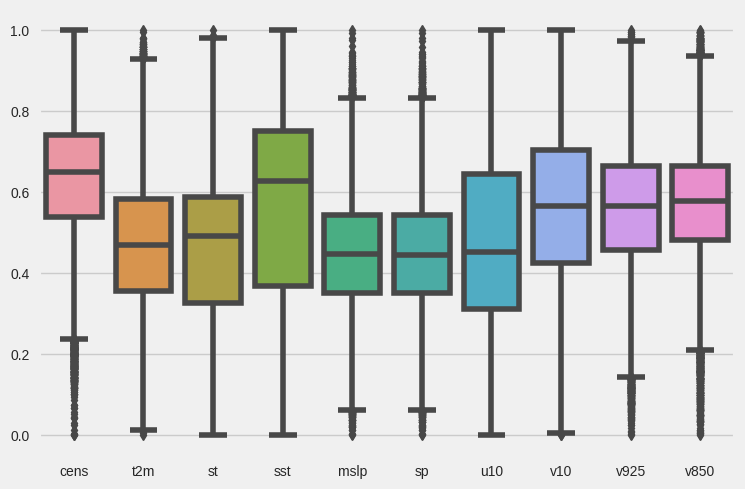

In [ ]:
scaler = MinMaxScaler()

fig = plt.figure()
scaled = scaler.fit_transform(data.iloc[:,:10])
sns.boxplot(scaled)
plt.xticks(range(10), data.columns[:10])
plt.show()

In [ ]:
#Cleaning Data
def remove_outliers(column):
    mean = column.mean()
    std = column.std()
    lower_bound = mean - 5 * std
    upper_bound = mean + 5 * std
    column = column.mask((column < lower_bound) | (column > upper_bound), mean)
    return column

data = data.apply(remove_outliers)

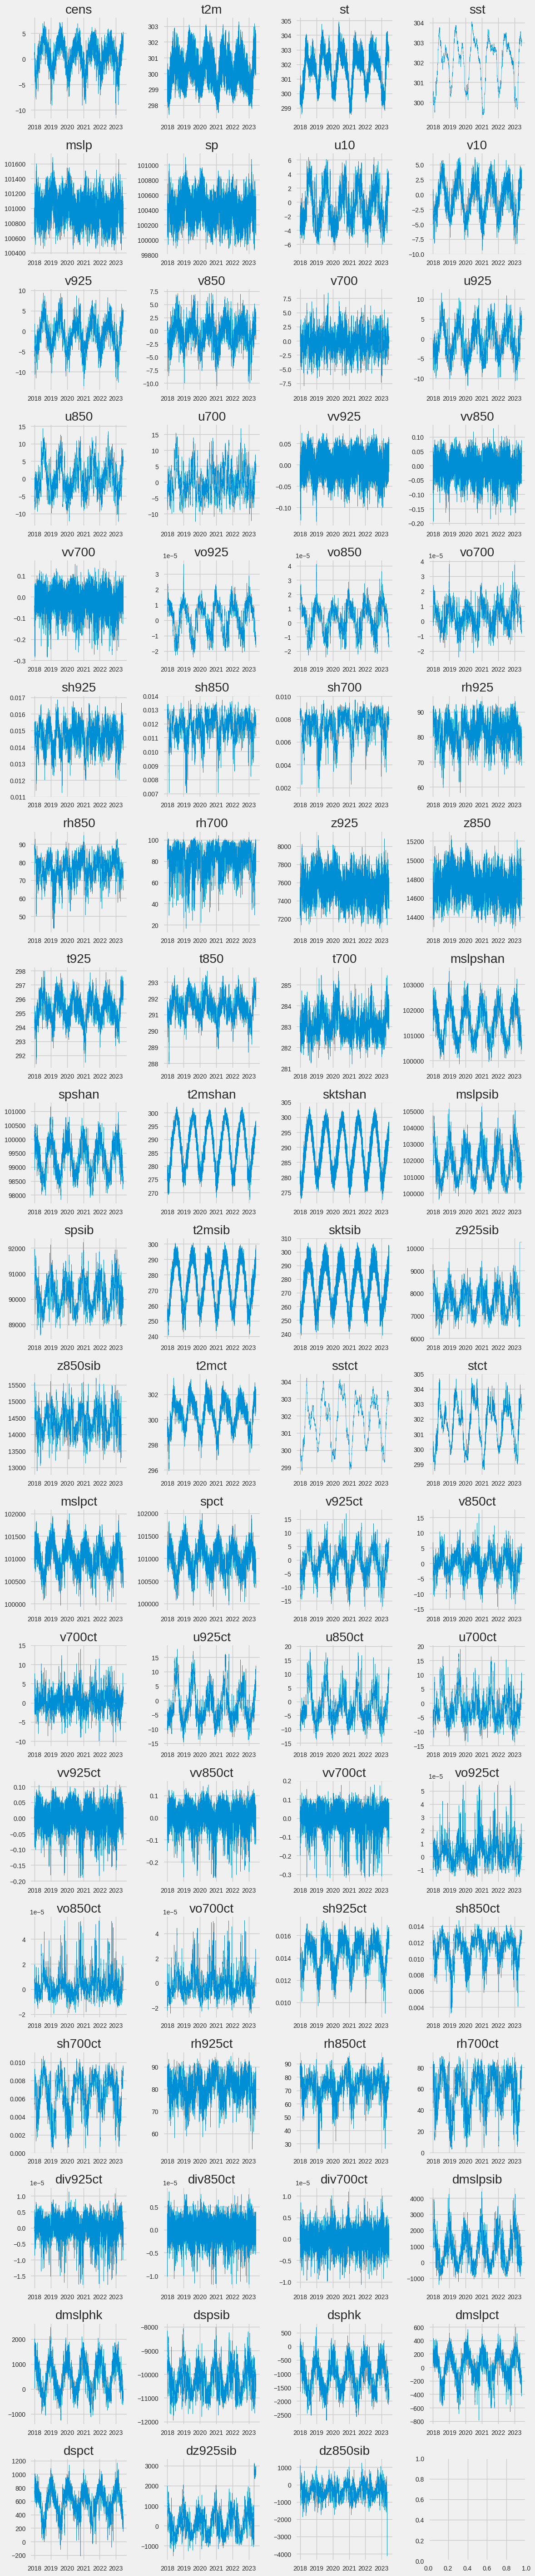

In [ ]:
#Plot all variable
total_cols = data.shape[1]
num_rows = (total_cols + 4 - 1) // 4


fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, num_rows * 3))

for i, col in enumerate(data.columns):
    ax = axes[i // 4, i % 4]
    ax.plot(data[col],linewidth=0.4)
    ax.set_title(col)

plt.tight_layout()

plt.show()

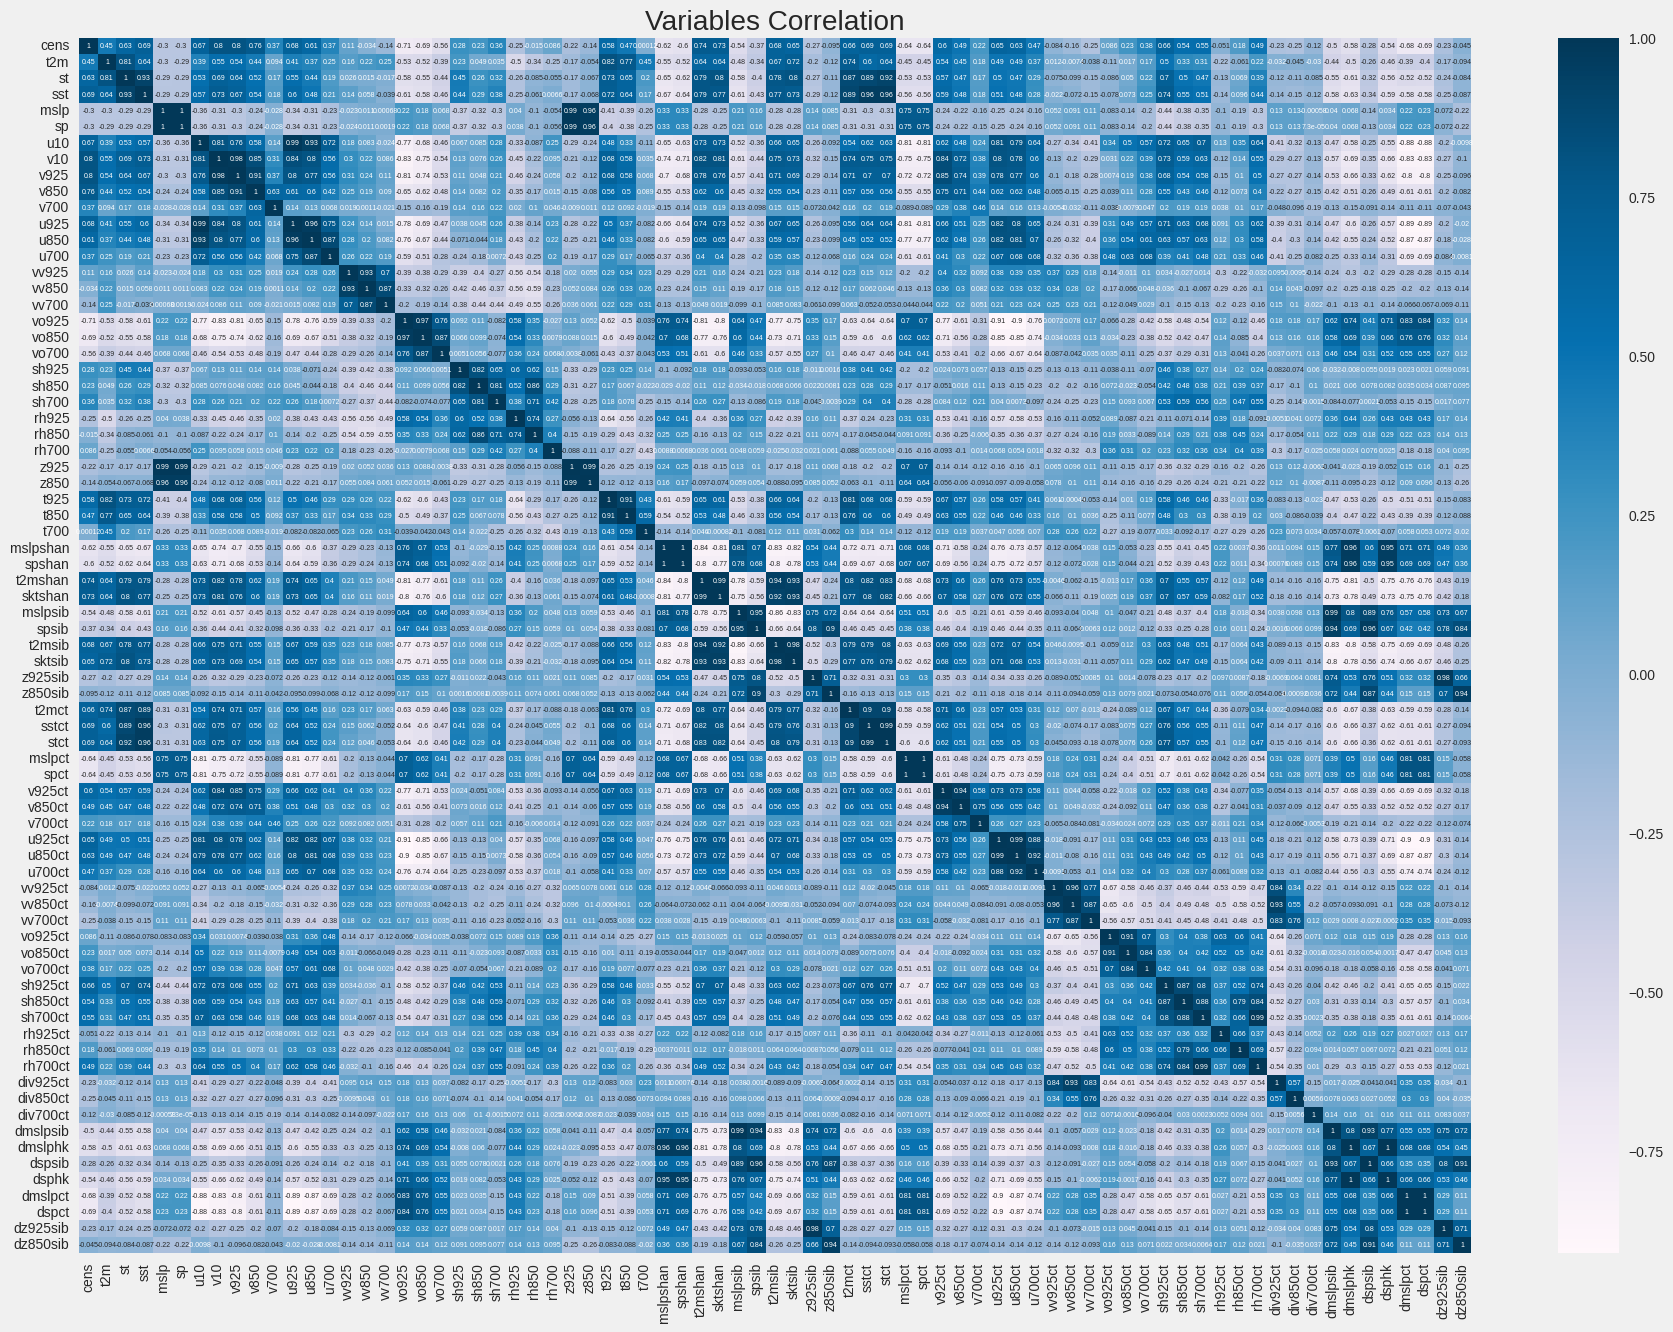

In [ ]:
indicators = data.columns[:]
plt.figure(figsize=(20,15))
sns.heatmap(data[indicators].corr(), annot=True, cmap="PuBu",annot_kws={"fontsize": 5})
plt.title("Variables Correlation")
plt.show()

In [ ]:
train_size = int(0.8 * len(data))

# Split training & test
y_train = data['cens'][:train_size]
X_train = data.drop('cens',axis=1)[:train_size]
y_test = data['cens'][train_size:]
X_test = data.drop('cens',axis=1)[train_size:]

"""code for shuffle train data"""
#train_data = np.column_stack((X_train, y_train))
#np.random.shuffle(train_data)
#X_train = train_data[:, :-1]
#y_train = train_data[:, -1]

print("Shape Data Train:", X_train.shape)

Shape Data Train: (38185, 74)


In [ ]:
# Model LightGBM
lgb_params={'n_estimators': 2822, 'max_depth': 2, 'learning_rate': 0.07289267457871532, 'subsample': 0.8362101731189066, 'reg_alpha': 0.5294708841147577, 'reg_lambda': 0.8180626444557617, 'colsample_bytree': 0.572137249155041, 'min_child_samples': 20}
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18870
[LightGBM] [Info] Number of data points in the train set: 38185, number of used features: 74
[LightGBM] [Info] Start training from score 0.597551


LGBMRegressor()

In [ ]:
# Model CatBoost
cb_params= {'n_estimators': 1658, 'max_depth': 4, 'learning_rate': 0.045945414297864126, 'subsample': 0.5690163310505083, 'rsm': 0.9108350526657705, 'reg_lambda': 0.7568165553426711, 'random_strength': 10}
cb_model = cb.CatBoostRegressor()
cb_model.fit(X_train, y_train, verbose=False)

In [ ]:
# Model XGBoost
xgb_params={'n_estimators': 2713, 'max_depth': 5, 'learning_rate': 0.008811585627593823, 'subsample': 0.5307165045453816, 'reg_alpha': 0.9587814870429702, 'reg_lambda': 0.34306966334630296, 'gamma': 0.18869787682536276, 'min_child_weight': 8}
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#TEST EVALUATION

# LightGBM Evaluation
lgb_predictions = lgb_model.predict(X_test)
lgb_r2 = r2_score(y_test, lgb_predictions)
lgb_mae = mean_absolute_error(y_test, lgb_predictions)
lgb_mse = mean_squared_error(y_test, lgb_predictions)
print("R2 score LightGBM:", lgb_r2)
print("MAE LightGBM:", lgb_mae)
print("MSE LightGBM:", lgb_mse)

# Catboost Evaluation
cb_predictions = cb_model.predict(X_test)
cb_r2 = r2_score(y_test, cb_predictions)
cb_mae = mean_absolute_error(y_test, cb_predictions)
cb_mse = mean_squared_error(y_test, cb_predictions)
print("R2 score CatBoost:", cb_r2)
print("MAE CatBoost:", cb_mae)
print("MSE CatBoost:", cb_mse)

# XGBoost Evaluation
xgb_predictions = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print("R2 score XGBoost:", xgb_r2)
print("MAE XGBoost:", xgb_mae)
print("MSE XGBoost:", xgb_mse)

R2 score LightGBM: 0.7697928896872575
MAE LightGBM: 0.9407907465079522
MSE LightGBM: 1.4864557414357866
R2 score CatBoost: 0.7808114852329407
MAE CatBoost: 0.9094009109865132
MSE CatBoost: 1.415308266498158
R2 score XGBoost: 0.7433258145374775
MAE XGBoost: 0.9927596551279935
MSE XGBoost: 1.6573546148978417


In [ ]:
#TRAIN EVALUATION

# LightGBM Evaluation
lgb_predictions = lgb_model.predict(X_train)
lgb_r2 = r2_score(y_train, lgb_predictions)
lgb_mae = mean_absolute_error(y_train, lgb_predictions)
lgb_mse = mean_squared_error(y_train, lgb_predictions)
print("R2 score LightGBM:", lgb_r2)
print("MAE LightGBM:", lgb_mae)
print("MSE LightGBM:", lgb_mse)

# Catboost Evaluation
cb_predictions = cb_model.predict(X_train)
cb_r2 = r2_score(y_train, cb_predictions)
cb_mae = mean_absolute_error(y_train, cb_predictions)
cb_mse = mean_squared_error(y_train, cb_predictions)
print("R2 score CatBoost:", cb_r2)
print("MAE CatBoost:", cb_mae)
print("MSE CatBoost:", cb_mse)

# XGBoost Evaluation
xgb_predictions = xgb_model.predict(X_train)
xgb_r2 = r2_score(y_train, xgb_predictions)
xgb_mae = mean_absolute_error(y_train, xgb_predictions)
xgb_mse = mean_squared_error(y_train, xgb_predictions)
print("R2 score XGBoost:", xgb_r2)
print("MAE XGBoost:", xgb_mae)
print("MSE XGBoost:", xgb_mse)

R2 score LightGBM: 0.9443918453665004
MAE LightGBM: 0.5079217416172951
MSE LightGBM: 0.40987060342378173
R2 score CatBoost: 0.9738536692870279
MAE CatBoost: 0.34356442927084335
MSE CatBoost: 0.19271656139777255
R2 score XGBoost: 0.9806090296893201
MAE XGBoost: 0.2914877711182058
MSE XGBoost: 0.14292487773768195


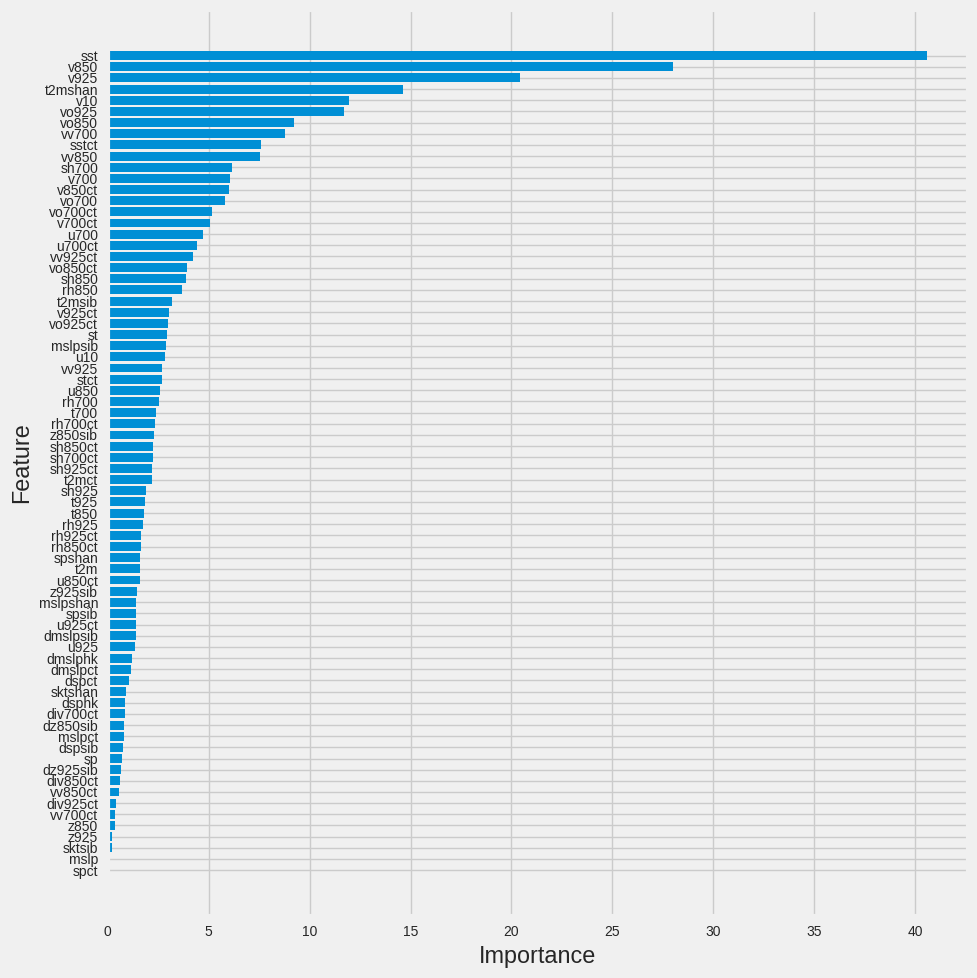

In [ ]:
xgb_importances = (xgb_model.feature_importances_/np.sum(xgb_model.feature_importances_))*100
catboost_importances = (cb_model.get_feature_importance()/np.sum(cb_model.get_feature_importance()))*100
lgb_importances = (lgb_model.feature_importances_/np.sum(lgb_model.feature_importances_))*100

# Combine Feature Importance
all_importances = np.vstack((xgb_importances, catboost_importances, lgb_importances))

average_importances = np.sum(all_importances, axis=0)

# Create dataframe for feature importance
feature_importances = pd.DataFrame({'Feature': list(X_test.columns) , 'Importance': average_importances})

# Sort Feature Importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 10))
plt.barh(feature_importances['Feature'],feature_importances['Importance'],linewidth=8)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.yticks(size=10)
plt.tight_layout()
plt.savefig('feature.png',dpi=300)
plt.show()

[11:22:46] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[11:22:47] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


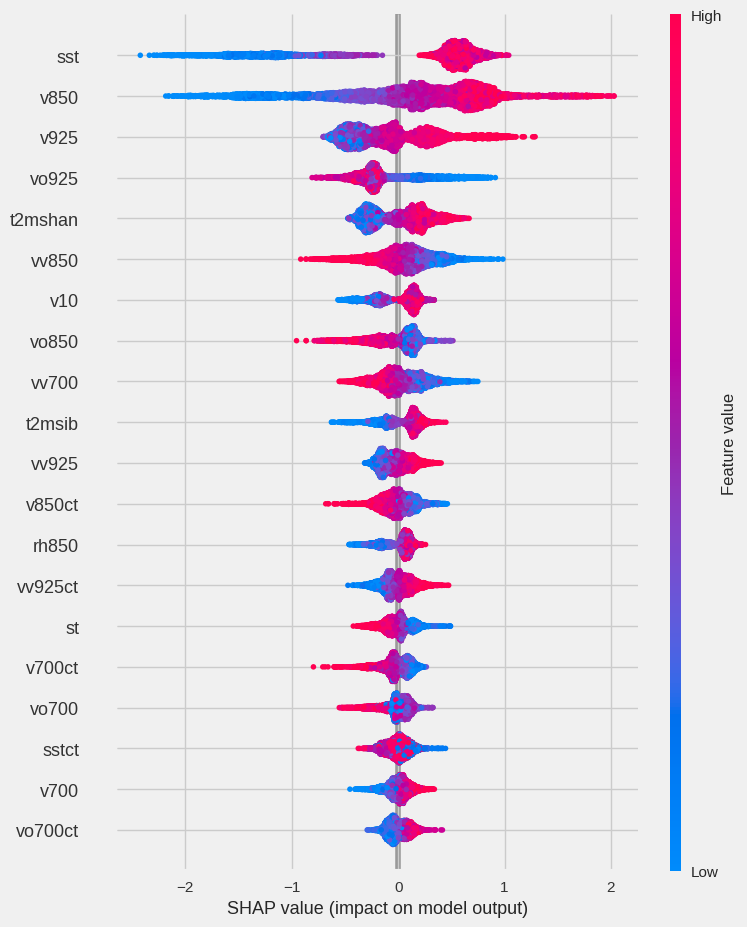

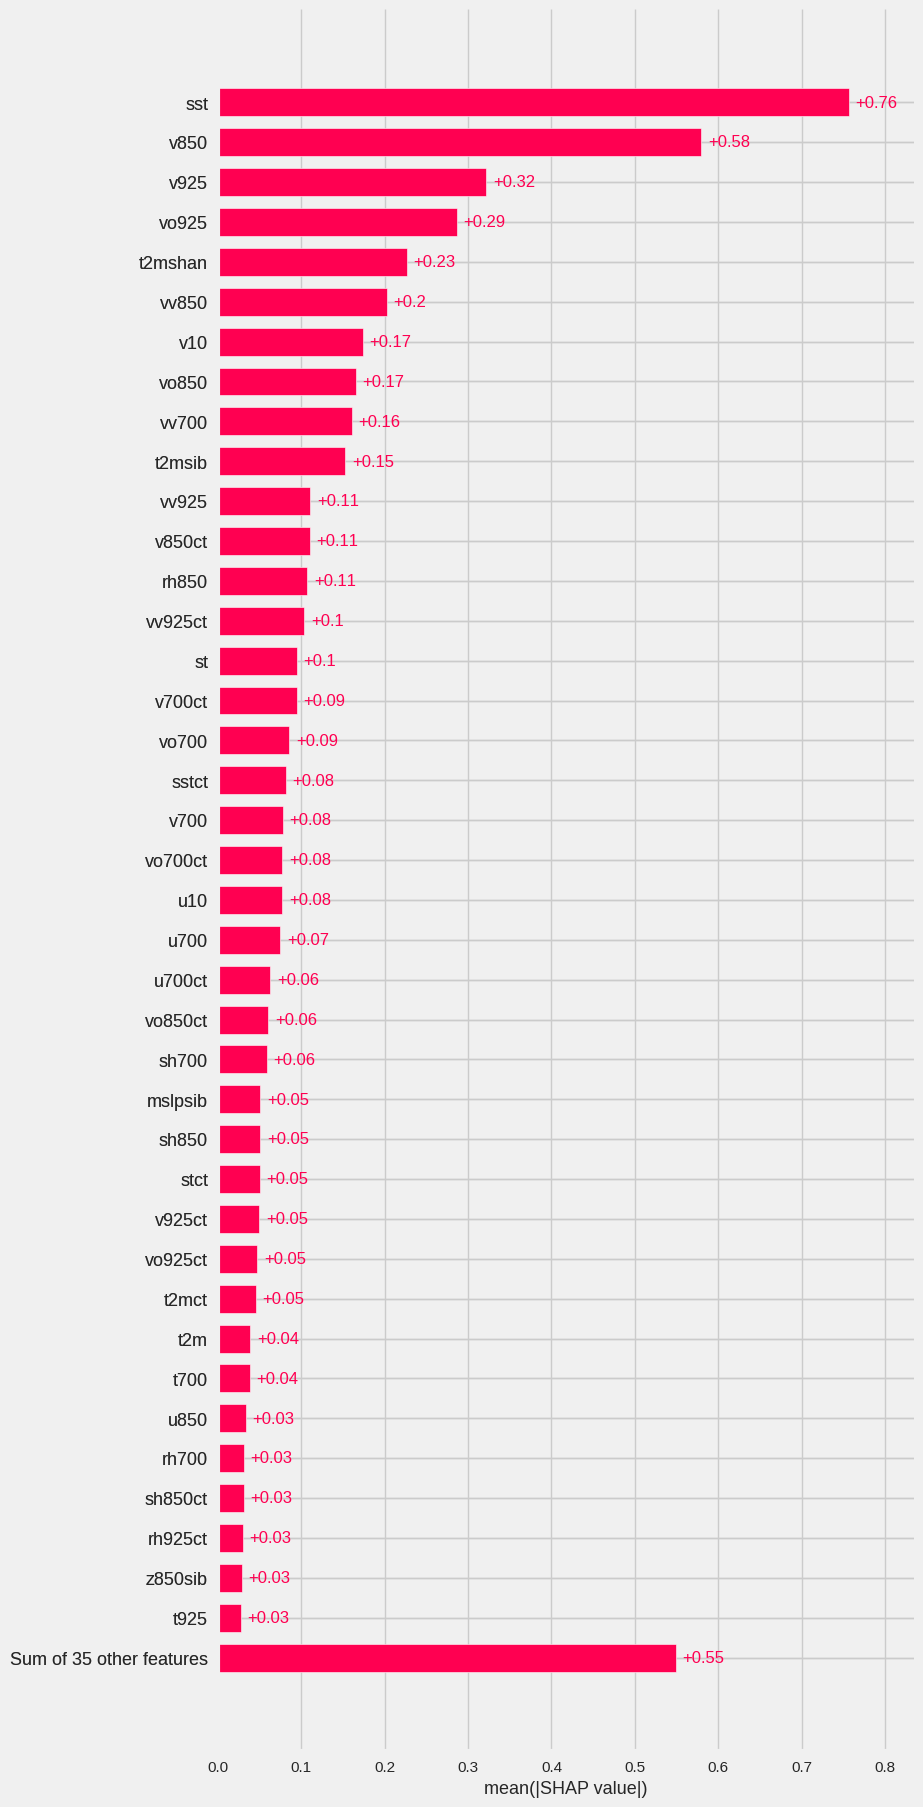

In [ ]:
xgbexplainer = shap.Explainer(xgb_model)
xgbshap_values = xgbexplainer(X_test)
shap.summary_plot(xgbshap_values, X_test)
shap.plots.bar(xgbshap_values,max_display=40)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


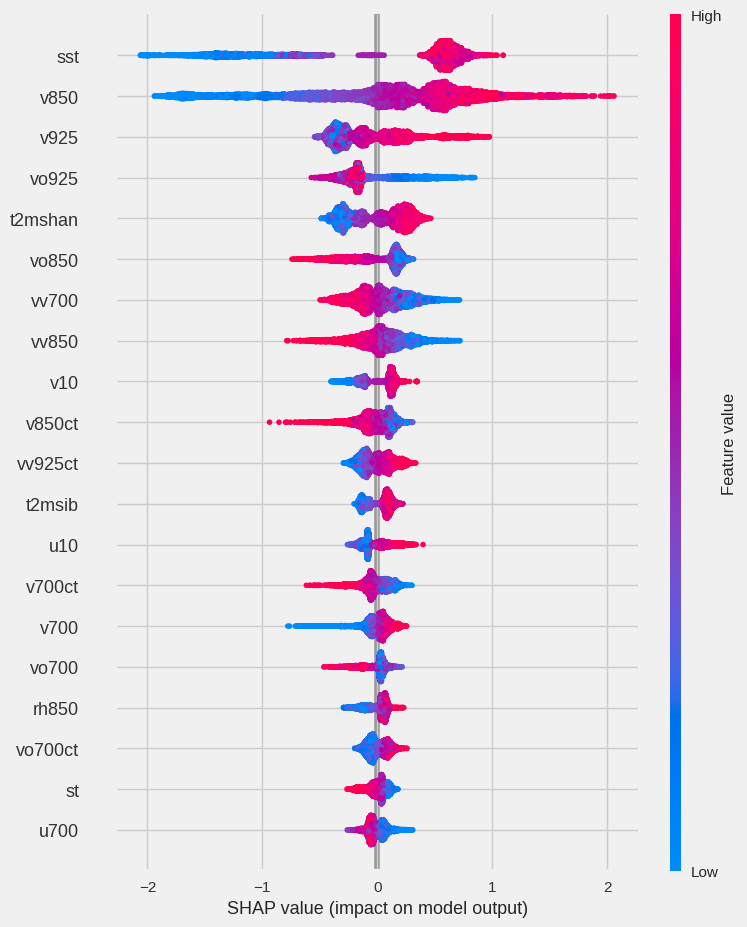

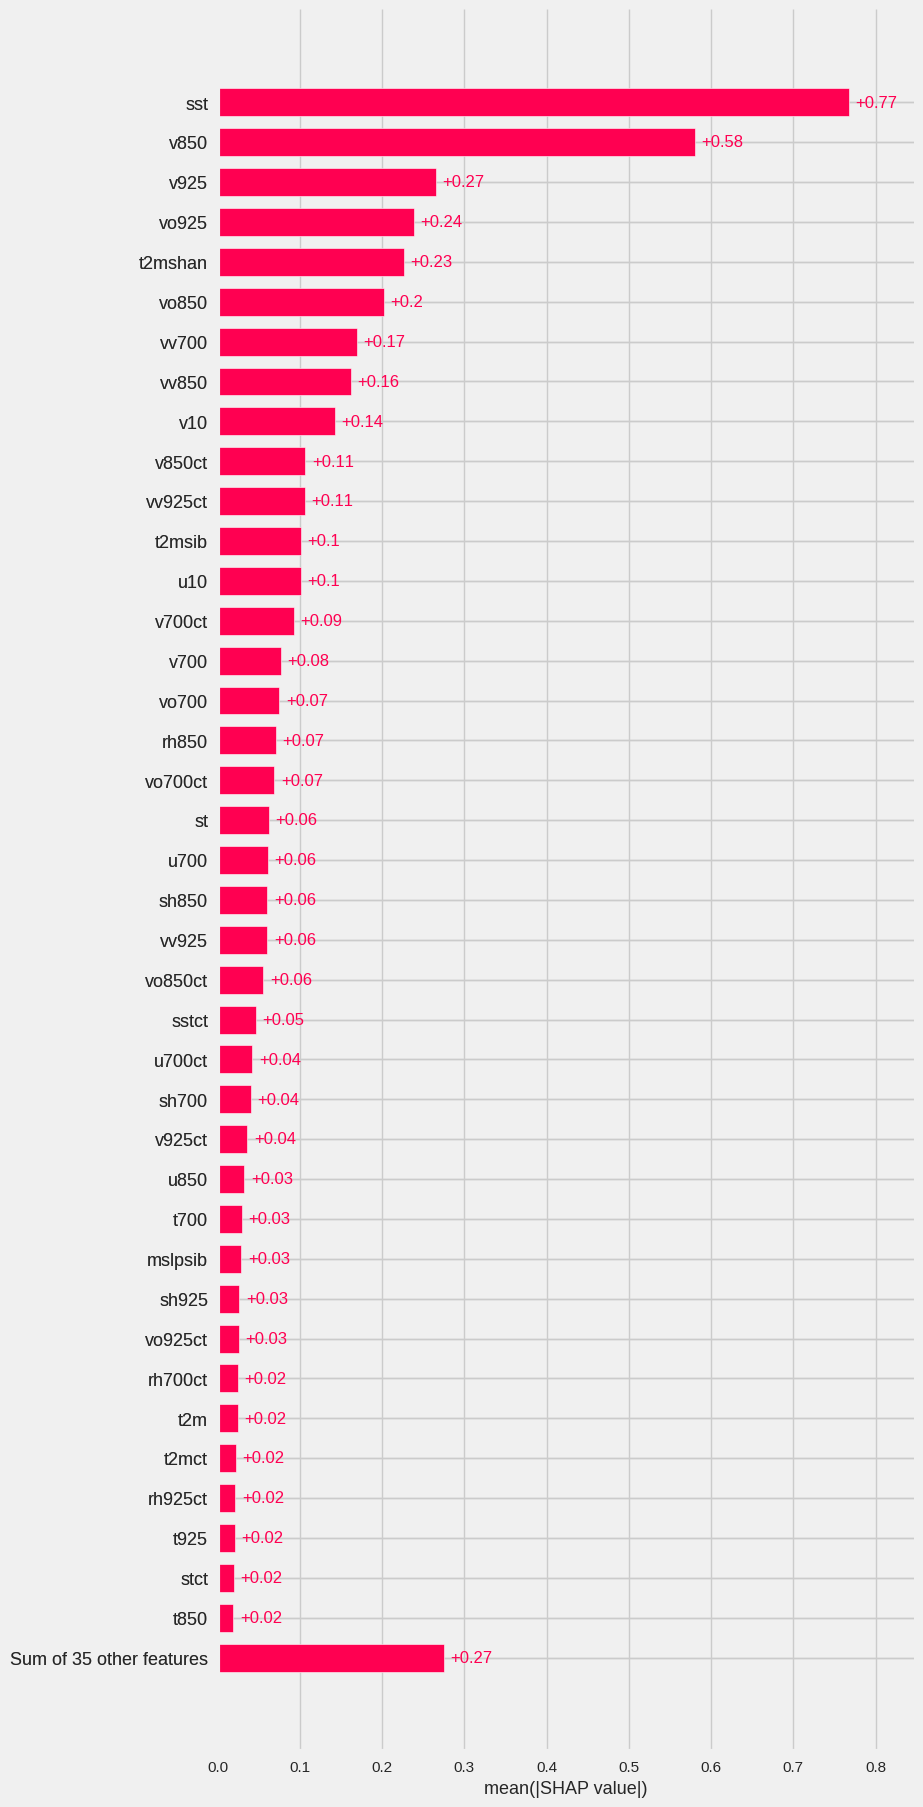

In [ ]:
lgbexplainer = shap.Explainer(lgb_model)
lgbshap_values = lgbexplainer(X_test)
shap.summary_plot(lgbshap_values, X_test)
shap.plots.bar(lgbshap_values,max_display=40)

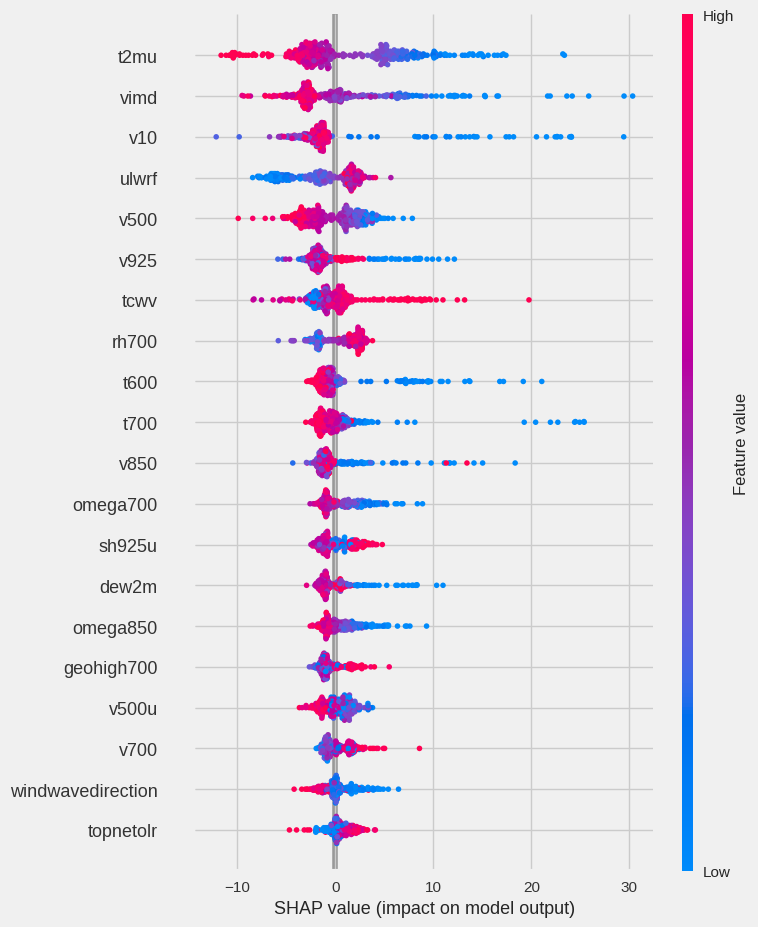

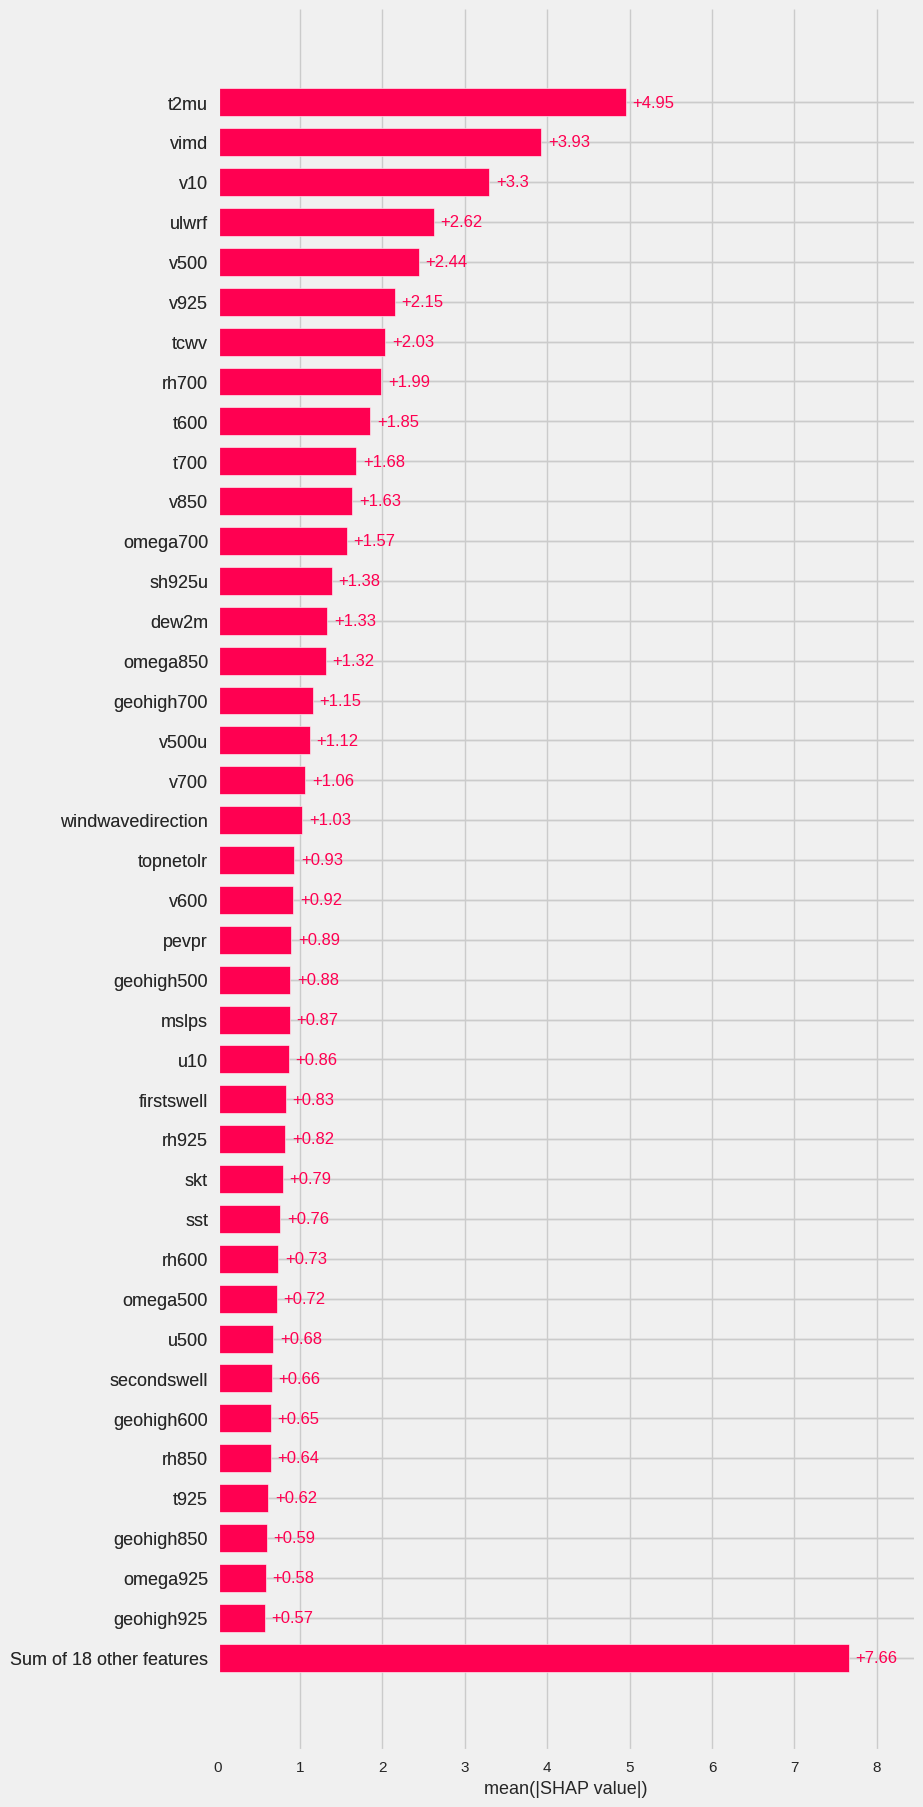

In [ ]:
cbexplainer = shap.Explainer(cb_model)
cbshap_values = cbexplainer(X_test)
shap.summary_plot(cbshap_values, X_test)
shap.plots.bar(cbshap_values,max_display=40)

In [ ]:
shapsum=cbshap_values+lgbshap_values+xgbshap_values/3

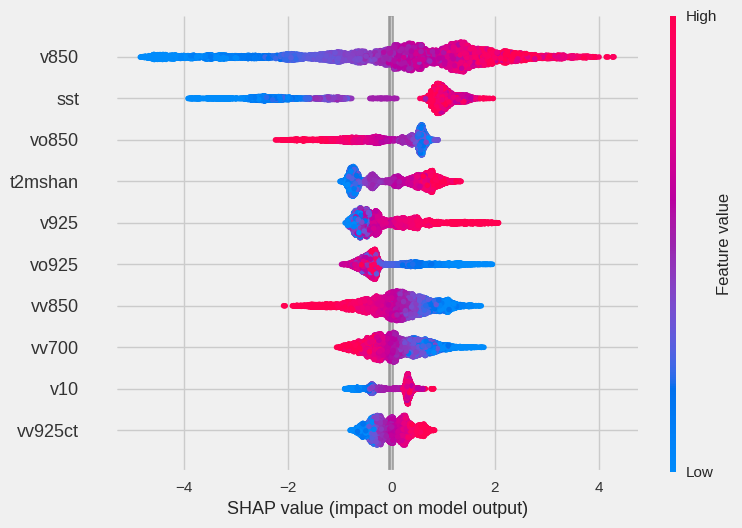

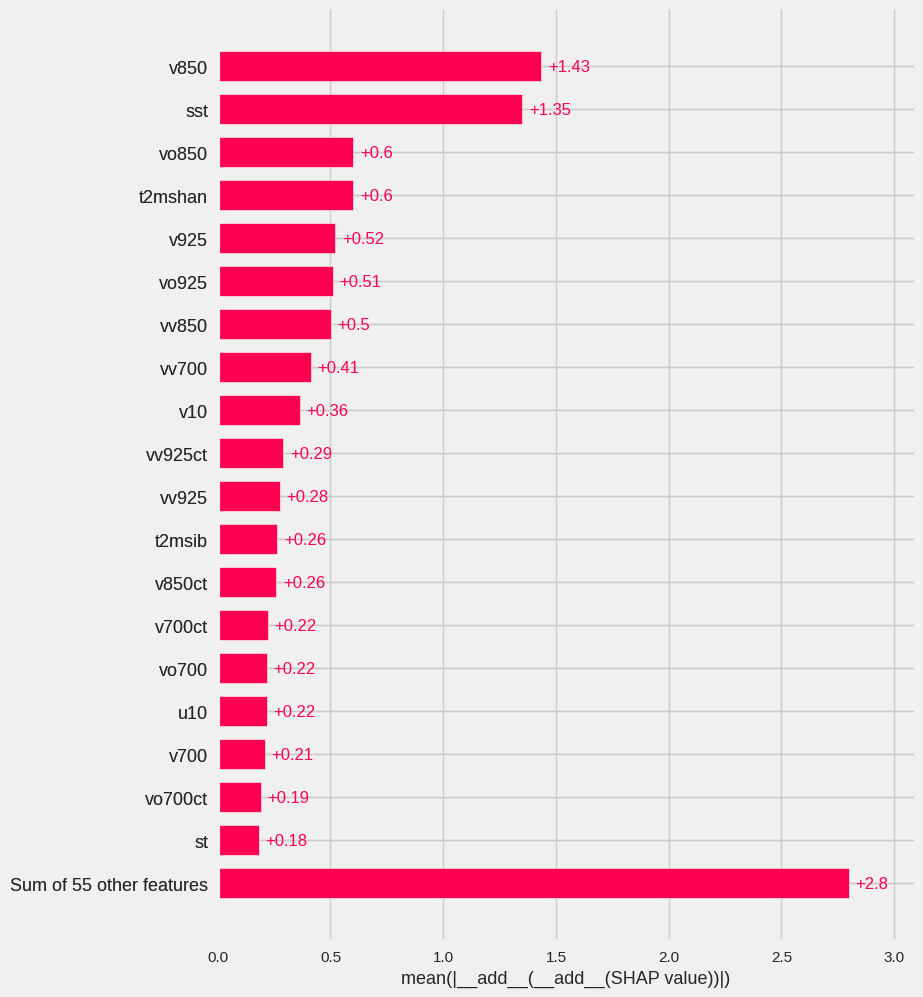

In [ ]:
shap.summary_plot(shapsum, X_test,max_display=10)
shap.plots.bar(shapsum,max_display=20)

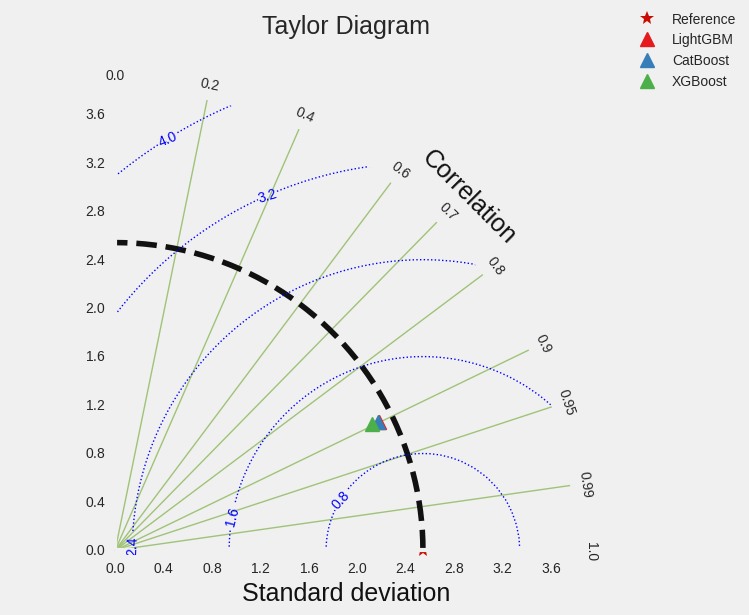

In [ ]:
import numpy as np
from easy_mpl import taylor_plot
observations = {'std': np.std(y_test)}
predictions = {   # pbias is optional
        'LightGBM': {'std': np.std(lgb_predictions), 'corr_coeff': np.sqrt(lgb_r2), 'pbias': np.sqrt(lgb_mse)},
        'CatBoost': {'std': np.std(cb_predictions), 'corr_coeff': np.sqrt(cb_r2), 'pbias':np.sqrt(cb_mse)},
        'XGBoost': {'std': np.std(xgb_predictions), 'corr_coeff': np.sqrt(xgb_r2), 'pbias':np.sqrt(xgb_mse)}}



_=taylor_plot(observations,
    predictions,
            plot_bias=True,
            cont_kws={'colors': 'blue', 'linewidths': 1.0, 'linestyles': 'dotted'},
            grid_kws={'axis': 'x', 'color': 'g', 'lw': 1.0},
            title="Taylor Diagram")

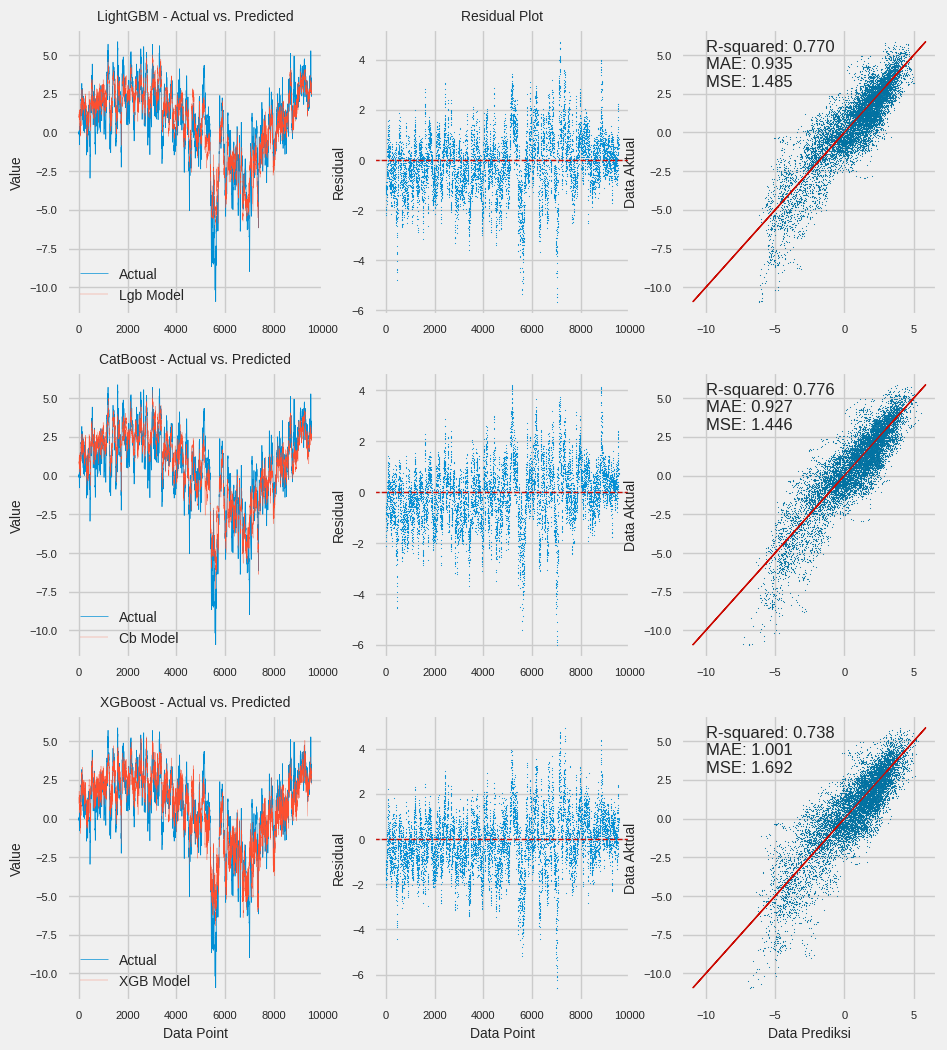

In [ ]:
actual=y_test
predicted_model1=lgb_predictions
predicted_model2=cb_predictions
predicted_model3=xgb_predictions

mse_model1 = mean_squared_error(actual, predicted_model1)
mae_model1 = mean_absolute_error(actual, predicted_model1)
r2_model1 = r2_score(actual, predicted_model1)

mse_model2 = mean_squared_error(actual, predicted_model2)
mae_model2 = mean_absolute_error(actual, predicted_model2)
r2_model2 = r2_score(actual, predicted_model2)

mse_model3 = mean_squared_error(actual, predicted_model3)
mae_model3 = mean_absolute_error(actual, predicted_model3)
r2_model3 = r2_score(actual, predicted_model3)
x=range(len(predicted_model1))
# Create figure with subplots
fig, axs = plt.subplots(3, 3, figsize=(10, 12))
# Plot actual vs. predicted values for each model
axs[0, 0].plot(x,actual, label='Actual',linewidth=0.5)
axs[0, 0].plot(x,predicted_model1, label='Lgb Model',linewidth=0.2)
axs[0, 0].set_ylabel('Value',fontsize=10)
axs[0, 0].set_title('LightGBM - Actual vs. Predicted',fontsize=10)
axs[0, 0].legend()
axs[0,0].tick_params(axis='both', which='major', labelsize=8)

axs[1, 0].plot(x,actual, label='Actual',linewidth=0.5)
axs[1, 0].plot(x,predicted_model2, label='Cb Model',linewidth=0.2)
axs[1, 0].set_ylabel('Value',fontsize=10)
axs[1, 0].set_title('CatBoost - Actual vs. Predicted',fontsize=10)
axs[1, 0].legend()
axs[1,0].tick_params(axis='both', which='major', labelsize=8)

axs[2, 0].plot(x,actual, label='Actual',linewidth=0.5)
axs[2, 0].plot(x,predicted_model3, label='XGB Model',linewidth=0.2)
axs[2, 0].set_xlabel('Data Point',fontsize=10)
axs[2, 0].set_ylabel('Value',fontsize=10)
axs[2, 0].set_title('XGBoost - Actual vs. Predicted',fontsize=10)
axs[2, 0].legend()
axs[2,0].tick_params(axis='both', which='major', labelsize=8)

# Calculate residuals for each model
residuals_model1 = actual - predicted_model1
residuals_model2 = actual - predicted_model2
residuals_model3 = actual - predicted_model3

# Plot residuals for each model
axs[0, 1].scatter(range(len(residuals_model1)), residuals_model1,s=0.1)
axs[0, 1].axhline(0, color='r', linestyle='--',linewidth=1)
axs[0, 1].set_ylabel('Residual',fontsize=10)
axs[0, 1].set_title('Residual Plot',fontsize=10)
axs[0,1].tick_params(axis='both', which='major', labelsize=8)

axs[1, 1].scatter(range(len(residuals_model2)), residuals_model2,s=0.1)
axs[1, 1].axhline(0, color='r', linestyle='--',linewidth=1)
axs[1, 1].set_ylabel('Residual',fontsize=10)
axs[1,1].tick_params(axis='both', which='major', labelsize=8)

axs[2, 1].scatter(range(len(residuals_model3)), residuals_model3,s=0.1)
axs[2, 1].axhline(0, color='r', linestyle='--',linewidth=1)
axs[2, 1].set_xlabel('Data Point',fontsize=10)
axs[2, 1].set_ylabel('Residual',fontsize=10)
axs[2,1].tick_params(axis='both', which='major', labelsize=8)

#plotscatter
axs[0,2].scatter(predicted_model1, actual, color='b',s=0.1)
axs[0,2].plot(actual, actual, color='r', label='Garis Referensi',linewidth=1)
#axs[0,2].xlabel('Data Prediksi')
axs[0,2].set_ylabel('Data Aktual',fontsize=10)
axs[0,2].text(-10, 3, f'R-squared: {lgb_r2:.3f}\nMAE: {lgb_mae:.3f}\nMSE: {lgb_mse:.3f}', fontsize=12)
axs[0,2].tick_params(axis='both', which='major', labelsize=8)


axs[2,2].scatter(predicted_model3, actual, color='b',s=0.1)
axs[2,2].plot(actual, actual, color='r', label='Garis Referensi',linewidth=1)
axs[2,2].set_xlabel('Data Prediksi',fontsize=10)
axs[2,2].set_ylabel('Data Aktual',fontsize=10)
axs[2,2].text(-10, 3, f'R-squared: {xgb_r2:.3f}\nMAE: {xgb_mae:.3f}\nMSE: {xgb_mse:.3f}', fontsize=12)
axs[2,2].tick_params(axis='both', which='major', labelsize=8)

# Atur ukuran xtick dan ytick menjadi lebih kecil
# Adjust spacing between subplots
plt.show()